In [1]:
import numpy as np
from pylab import *

In [2]:
def trapezoidal(f, a, b, N):
    x = linspace(a, b, N + 1)
    y = f(x)
    h = (b - a) / N
    return np.sum(y[:-1:] + y[1::]) * h / 2

In [3]:
def simpson(f, a, b, N):
    x = linspace(a, b, N + 1)
    y = f(x)
    h = (b - a) / N
    return np.sum(y[:-1:2] + 4*y[1::2] + y[2::2]) * h / 3

In [4]:
f1 = lambda x: 1 / (1. + x**2)
f2 = lambda x: x ** (1. / 3.) * np.exp(np.sin(x))

In [5]:
M = 20

In [6]:
N = [2 ** (2 + i) for i in range(M)]
y1_simp, y2_simp, y1_trap, y2_trap = [], [], [], []
for n in N:
    y1_simp += [simpson(f1, -1., 1., n)]
    y2_simp += [simpson(f2, 0., 1., n)]
    y1_trap += [trapezoidal(f1, -1., 1., n)]
    y2_trap += [trapezoidal(f2, 0., 1., n)]

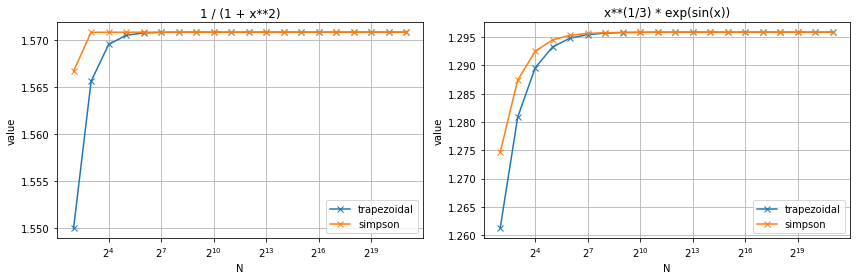

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(N, y1_trap, 'x-', label='trapezoidal')
plt.plot(N, y1_simp, 'x-', label='simpson')
plt.xlabel('N')
plt.ylabel('value')
plt.xscale('log', basex=2)
plt.legend(loc=4)
plt.grid()
plt.title('1 / (1 + x**2)')

plt.subplot(122)
plt.plot(N, y2_trap, 'x-', label='trapezoidal')
plt.plot(N, y2_simp, 'x-', label='simpson')
plt.xlabel('N')
plt.ylabel('value')
#plt.yscale('log', basey=10)
plt.xscale('log', basex=2)
plt.legend(loc=4)
plt.grid()
plt.title('x**(1/3) * exp(sin(x))')

plt.tight_layout()

In [14]:
print(y1_simp[-1], '\t', y1_trap[-1])
print(y2_simp[-1], '\t', y2_trap[-1])

1.5707963267948972 	 1.5707963267948204
1.2958740082219495 	 1.2958740076985633


In [15]:
exact = simpson(f2, 0., 1., 2 ** 24)
print(exact)

1.2958740086998495


In [16]:
error1_simp, error2_simp = [np.abs(np.pi / 2 - y1_simp[i]) for i in range(M)], [np.abs(exact - y2_simp[i]) for i in range(M)]
error1_trap, error2_trap = [np.abs(np.pi / 2 - y1_trap[i]) for i in range(M)], [np.abs(exact - y2_trap[i]) for i in range(M)]

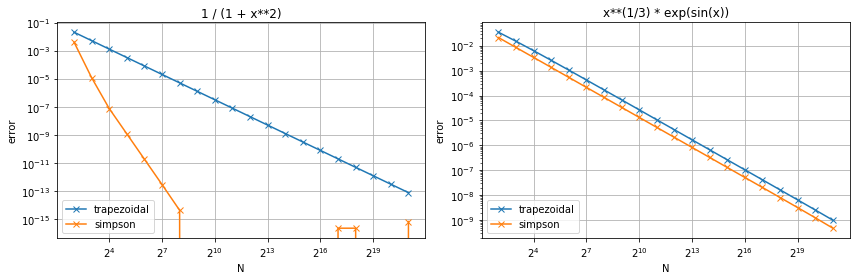

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.loglog(N, error1_trap, 'x-', label='trapezoidal')
plt.loglog(N, error1_simp, 'x-', label='simpson')
plt.xlabel('N')
plt.ylabel('error')
plt.yscale('log', basey=10)
plt.xscale('log', basex=2)
plt.legend(loc=3)
plt.grid()
plt.title('1 / (1 + x**2)')

plt.subplot(122)
plt.loglog(N, error2_trap, 'x-', label='trapezoidal')
plt.loglog(N, error2_simp, 'x-', label='simpson')
plt.xlabel('N')
plt.ylabel('error')
plt.yscale('log', basey=10)
plt.xscale('log', basex=2)
plt.legend(loc=3)
plt.grid()
plt.title('x**(1/3) * exp(sin(x))')

plt.tight_layout()